### 机器学习基础

1.scikit-learn包引例

In [4]:
import pandas as pd
from sklearn.datasets import load_iris
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=["Species"])
df = pd.concat([X, y], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


sepal length表示萼叶长度<br>
sepal width表示萼叶宽度<br>
petal length表示花瓣长度<br>
petal width表示花瓣宽度<br>

#### 使用乳腺癌数据集进行有监督分类实现

![title](./image/breast_cancer.jpg)

1.通过scikit-learn包读取数据

In [5]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [6]:
X = data.data
Y = data.target

2.截取数据集中平均值部分的特征值

In [7]:
X = X[:,:10]

3.调用逻辑回归算法进行分类

In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

4.使用fit方法训练模型

In [9]:
model.fit(X,Y)

D:\conda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

5.使用训练好的模型进行预测

In [10]:
Y_pred = model.predict(X)

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(Y,Y_pred)

0.9121265377855887

此次有监督学习输出的正确率使用的是学习过的数据计算出来的，存在过拟合的问题。

#### 使用葡萄酒数据进行无监督聚类实现

![title](./image/wine.jpg)

1.同样的步骤进行数据的获取

In [12]:
from sklearn.datasets import load_wine
data = load_wine()

In [13]:
X = data.data[:, [0, 9]]

2.使用k-means算法进行聚类<br>
将数据分为三个簇

In [14]:
from sklearn.cluster import KMeans
n_clusters = 3
model = KMeans(n_clusters=n_clusters,n_init='auto')

In [15]:
pred = model.fit_predict(X)

此时预测结果赋给预测结果赋
给变量 pred<br>接下来为查看聚类数据可视化做准备

### 可视化Matplotlib

在上一次文档提到的魔术命令起到作用<br>导入numpy用于生成数据<br>导入matplotlib用于图形显示

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
x1 = np.linspace(-5, 5, 101)
y1 = np.sin(x1)

简单的sin(x)函数图像

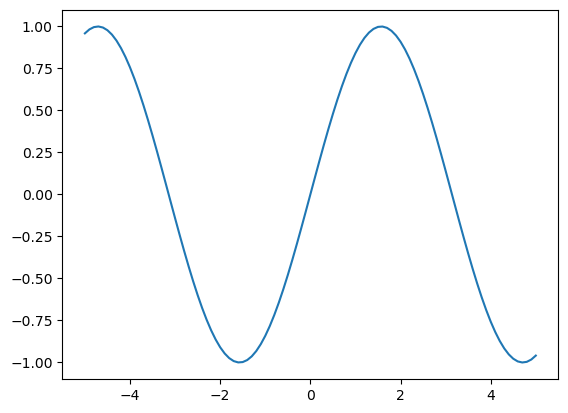

In [18]:
plt.plot(x1, y1)

Matplotlib 绘制图形的代码的标准写法

In [7]:
%matplotlib inline

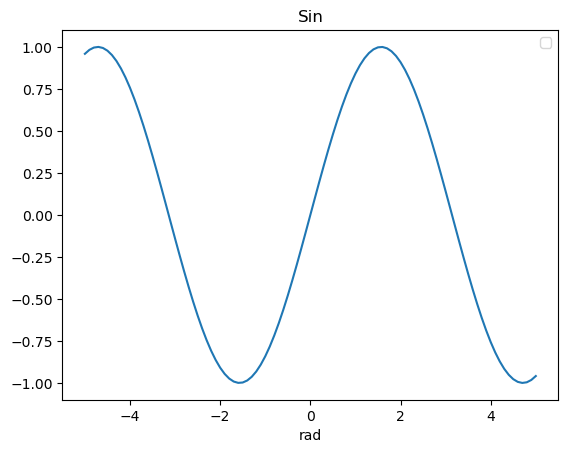

In [12]:
fig, ax = plt.subplots() #创建图形对象和轴对象
ax.set_title("Sin")
ax.set_xlabel("rad")
ax.plot(x1, y1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

绘制散点图

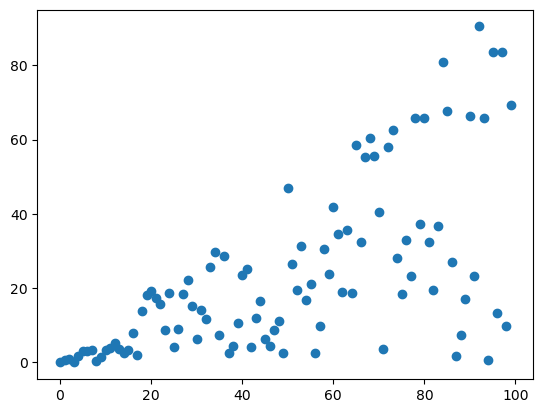

In [21]:
x2 = np.arange(100)
y2 = x2 * np.random.rand(100)
plt.scatter(x2, y2)

绘制直方图

(array([50., 29.,  5., 12.,  4.]),
 array([ 0.        , 18.08828378, 36.17656757, 54.26485135, 72.35313514,
        90.44141892]),
 <BarContainer object of 5 artists>)

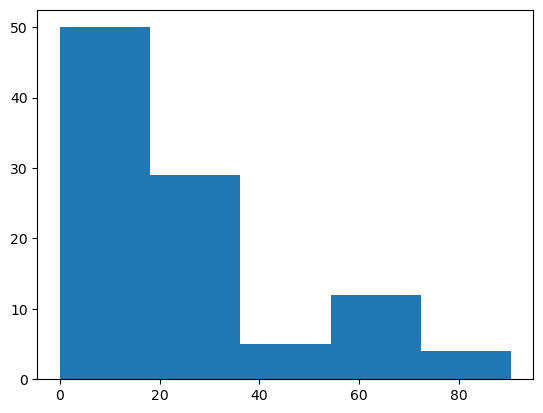

In [22]:
plt.hist(y2, bins=5)

绘制柱状图

<BarContainer object of 100 artists>

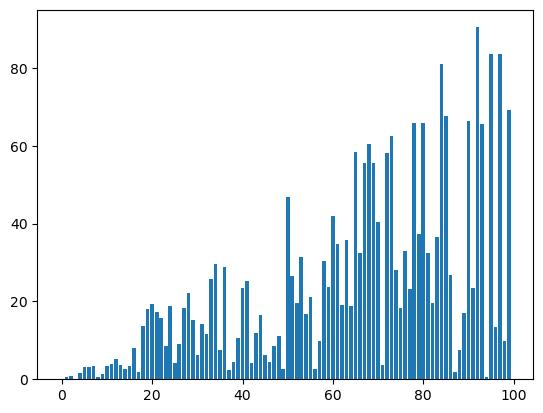

In [23]:
plt.bar(x2, y2)

绘制折线图

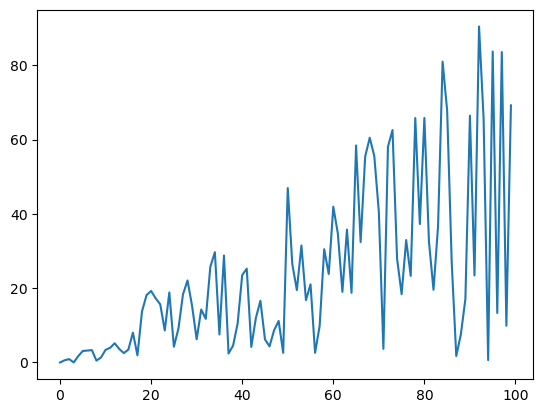

In [24]:
plt.plot(x2, y2)

接下来会到之前红酒数据集的可视化

In [25]:
x3 = data.data[:, [0]]
y3 = data.data[:, [9]]

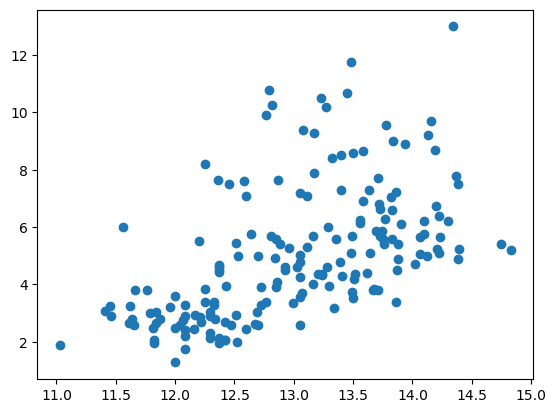

In [26]:
plt.scatter(x3, y3)

### 可视化Pandas

In [27]:
import pandas as pd
df_X = pd.DataFrame(data.data, columns=data.feature_names)
df_X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


将红酒数据的目标变量转换为pandas的dataframe

In [28]:
df_y = pd.DataFrame(data.target, columns=["kind(target)"])
df_y.head()

,kind(target)
0,0
1,0
2,0
3,0
4,0


In [29]:
df = pd.concat([df_X, df_y], axis=1)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,kind(target)
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
